# The Best Fit Slope

In [1]:
# !pip install mpld3

In [2]:
import numpy as np
import random, mpld3
from statistics import mean
from matplotlib import style
import matplotlib.pyplot as plt

# mpld3.enable_notebook()
style.use('fivethirtyeight')

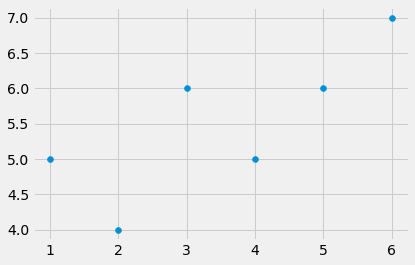

In [3]:
xs = np.arange(1,7, dtype=np.float64)
ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)
# the default dtype is np.float64. We didn't change anything!
plt.scatter(xs, ys)
plt.show()

## Best Fit Slope And y Intercept

In [4]:
def best_fit_slope_and_intercept(xs, ys):
  """Find the best fit slope of data."""
  m = ( ((mean(xs) * mean(ys)) - mean(xs * ys)) /
       ((mean(xs) ** 2) - mean(xs ** 2)) )
  b = (mean(ys) - (m * mean(xs)))

  return m, b


m, b = best_fit_slope_and_intercept(xs, ys)
m, b

(0.42857142857142866, 4.0)

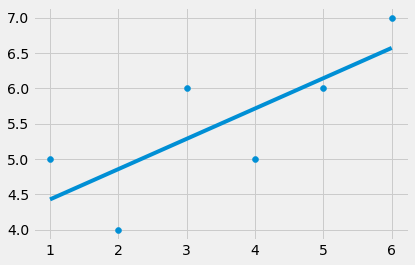

In [5]:
regression_line = [((m * x) + b) for x in xs]

plt.scatter(xs, ys)
plt.plot(xs , regression_line)
plt.show()

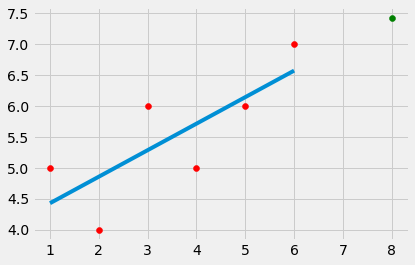

In [6]:
predict_x = 8
predict_y = (m * predict_x) + b

plt.scatter(xs, ys, color='r')
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs , regression_line)
plt.show()

## R Squared

In [7]:
def squared_error(ys_orig, ys_line):
  """Calculate squared error."""
  return sum((ys_line - ys_orig) ** 2)


def coefficient_of_determination(ys_orig, ys_line):

  y_mean_line = [mean(ys_orig) for y in ys_orig]
  squared_error_regr = squared_error(ys_orig, ys_line)
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)

  return 1 - (squared_error_regr / squared_error_y_mean)


r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.5844155844155845

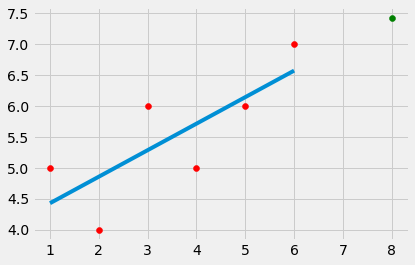

In [8]:
plt.scatter(xs, ys, color='r')
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs , regression_line)
plt.show()

## Testing Assumptions

In [9]:
def create_dataset(hm, variance, step=2,correlation=False):
    """Create a dataset.
    hm: number of arguments in dataset (how many numbers?)
    varaince: variety
    step: How far in avarage to step up the y value per point.
    correlation:
      True for positive slope
      False for negative slope
    """
    val = 1
    ys = list()

    for i in range(hm):
      y = val + random.randrange(-variance, variance)
      ys.append(y)
      if correlation and correlation =='pos':
        val +=step
      elif correlation and correlation == 'neg':
        val -=step
    
    xs = [i for i in range(len(ys))]

    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


0.8247879937981211


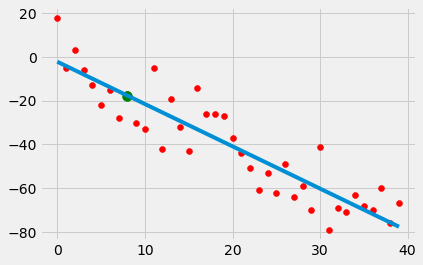

In [10]:
# xs, ys = create_dataset(40, 40, 2, "pos")
# xs, ys = create_dataset(40, 10, 2, "pos")
# xs, ys = create_dataset(40, 20, 2, "pos")
xs, ys = create_dataset(40, 20, 2, "neg")
# xs, ys = create_dataset(40, 20, 2)

m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [((m * x) + b) for x in xs]
predict_x = 8
predict_y = (m * predict_x) + b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs, ys, color='r')
plt.plot(xs , regression_line)
plt.scatter(predict_x, predict_y,s=100, color='g')
plt.show()